> Wind hourly generation time series at country, NUTS 1, NUTS 2 level and bidding zones

Citation

https://zenodo.org/records/8340501

[1]I. Gonzalez-Aparicio, A. Zucker, F. Careri, F. Monforti, T. Huld와/과 J. Badger, “EMHIRES dataset: wind and solar power generation”. Zenodo, 5 26, 2021. doi: 10.5281/zenodo.8340501.

https://data.jrc.ec.europa.eu/dataset/jrc-emhires-wind-generation-time-series

---

**EMHIRES Wind 풍력**

The first version of EMHIRES dataset releases four different files about the wind power generation hourly time series during 30 years (1986-2015), taking into account the existing wind fleet at the end of 2015, for each country (onshore and offshore), bidding zone and by NUTS 1 and NUTS 2 region. The time series are given as capacity factors. The installed capacity used accounted for calculating the capacity factors are summarised in the annexes of the report.

https://setis.ec.europa.eu/emhires-dataset-part-i-wind-power-generation_en

EMHIRES 데이터셋의 첫 번째 버전은 30년(1986-2015) 동안의 시간별 풍력 발전 시계열에 관한 네 가지 파일을 제공합니다. 이 데이터는 2015년 말 기준으로 각 국가(육상 및 해상), 입찰 구역, 그리고 NUTS 1 및 NUTS 2 지역별로 풍력 발전 용량 계수를 고려하여 작성되었습니다. 시계열 데이터는 용량 계수로 제공되며, 사용된 설치 용량에 대한 정보는 보고서 부록에 요약되어 있습니다.

EMHIRES 풍력 발전 시계열 데이터는 ENTSO-E 연간 생산 통계에 따라 표준화

---

- EMHIRES는 EU-28, 노르웨이, 스위스, 그리고 서발칸 비EU 국가들의 재생 가능 전력(RES-E) 생성 시간 시리즈를 제공합니다. 
- 이 시간 시리즈는 시간별 단위로 제공되며, 다양한 집계 수준에서 제공됩니다. 구체적으로는 국가별(온쇼어와 오프쇼어), 전력 시장 입찰 구역(bidding zone), 그리고 유로스타트(EUROSTAT)에서 정의한 유럽의 통계적 지역 단위(NUTS)에 따라 제공됩니다. 
- 특히, NUTS 1 및 NUTS 2 수준으로 제공됩니다.

- 시간 시리즈 집계 수준:
    - 국가별(온쇼어 및 오프쇼어 풍력 발전 포함)
    - 전력 시장 입찰 구역별(bidding zone)
    - NUTS 1 및 NUTS 2 수준으로 세분화된 데이터
    - 전력 시장 구역 (Bidding Zones):

- 정치적/영토적 경계와 다른 구역: 전력 시장 현실을 반영하기 위해, 정치적 또는 영토적 경계와는 다른 구역으로 데이터가 제공됩니다. 예를 들어, 아일랜드에서는 공화국과 북아일랜드가 하나의 시장 구역으로 묶여 있습니다.
- 특별한 구역 설정: 노르웨이, 스웨덴, 덴마크, 이탈리아 등에서는 풍력 발전소가 설치된 지역에 대해 각기 다른 시장 구역을 세분화하여 제공합니다. 예를 들어, 이탈리아는 6개 구역으로 나뉩니다.
- 그리스의 경우: 그리스에서는 연결된 구역에 대해서만 시간 시리즈가 제공됩니다. 즉, 섬 지역에 있는 풍력 발전소는 본토 전력 시스템에 연결되지 않으므로 제외됩니다.

---

# Import

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import itstgcn_intro
import random
import plotly.express as px

# 국가별 해상 발전

- offshore 해상 풍력
- BE Belgium 벨기에
- DK Denmark 덴마크
- DE Germany 독일
- NL Netherlands 네덜란드
- UK United Kingdom 영국
- 1986년부터 2015년까지 30년 동안의 기상 조건에 따른 시간별 풍력 발전 시계열 데이터를 제공

In [196]:
file_path = '../../../TS.CF.OFFSHORE.30yr.date.csv'

df = pd.read_csv(file_path).iloc[:,1:]

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262968 entries, 0 to 262967
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Time step  262968 non-null  int64  
 1   Date       262968 non-null  object 
 2   Year       262968 non-null  int64  
 3   Month      262968 non-null  int64  
 4   Day        262968 non-null  int64  
 5   Hour       262968 non-null  int64  
 6   BE         262968 non-null  float64
 7   DK         262968 non-null  float64
 8   DE         262968 non-null  float64
 9   NL         262968 non-null  float64
 10  UK         262968 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 22.1+ MB


In [198]:
(df==0).sum()

Time step        0
Date             0
Year             0
Month            0
Day              0
Hour         10957
BE           21011
DK             351
DE             576
NL           14637
UK              27
dtype: int64

In [199]:
df = df.iloc[:1000,:]

In [200]:
_node_ids = {
    'node0': 'BE',
    'node1': 'DK',
    'node2': 'DE',
    'node3': 'NL',
    'node4': 'UK',
}

_FX1=[]
for i in ['BE','DK','DE','NL','UK']:
    _FX1.append(df.iloc[:,1:][i])
_FX1 = np.array(_FX1).reshape(-1,5).tolist()
    
edges = torch.tensor([[0,1],[1,2],[2,3],[3,4]]).tolist()

data_dict = {'edges':edges, 'node_ids':_node_ids, 'FX':_FX1}

node0 = df.BE
node1 = df.DK
node2 = df.DE
node3 = df.NL
node4 = df.UK

In [201]:
data = pd.DataFrame({'node0':node0,'node1':node1,'node2':node2,'node3':node3,'node4':node4})

In [202]:
loader = itstgcn_intro.DatasetLoader(data_dict)

In [203]:
nodes = len(data_dict['edges'])

In [204]:
T = len(data_dict['FX'])

In [205]:
lags=2

In [224]:
mindex=[random.sample(range(0, T), int(T*0.8)),[np.array(list(range(10,50)))],[],[],[]]
# mindex = []

In [225]:
mtype='block'

In [226]:
name = 'Proposed'

In [227]:
observed_values = []

In [228]:
for node in range(nodes+1):
    observed_values.append({
        f'node{node}': data[f'node{node}']
    })

In [229]:
dataset = loader.get_dataset(lags=2)

In [230]:
dataset_miss = itstgcn_intro.miss(dataset,mindex,mtype=mtype)

In [231]:
dataset_padded = itstgcn_intro.padding(dataset_miss,interpolation_method='linear')

In [232]:
epochs = 5

In [233]:
filters = 32

In [234]:
if name == 'Classic' :
    lrnr = itstgcn_intro.StgcnLearner(dataset_padded)
elif name == 'Proposed' :
    lrnr = itstgcn_intro.ITStgcnLearner(dataset_padded)

In [235]:
lrnr.learn(filters, epochs)

In [236]:
dfs_by_node = {}

In [237]:
results=lrnr.result_dict

In [238]:
for node in range(0, nodes):
        df_node = pd.DataFrame()
        df_node[f'node{node}'] = observed_values[node][f'node{node}'][:-lags]
        df_node[f'node{node}_padding'] = torch.tensor(dataset_padded.targets).reshape(-1,nodes+1)[:,node]

        for epoch in range(epochs):
            epoch_key = f'epoch={epoch},node={node}'
            df_node[epoch_key] = [
                str(results[f'epoch={epoch},time={time_step}'].detach()[node]).replace("tensor(", "").strip().replace(")", "").strip()
                for time_step in range(0, T-lags)]

            if name == "Proposed" :
                df_node[f'epoch={epoch},node{node},trim'] = lrnr.trimed[f'epoch={epoch}'][:,node][:-lags]
                df_node[f'epoch={epoch},node{node},threshed'] = lrnr.threshed[f'epoch={epoch}'][:,node][:-lags]**2
                df_node[f'epoch={epoch},node{node},power'] = lrnr.power[f'epoch={epoch}'][:,node][:-lags]**2
            else:
                pass

        df_node = df_node.reset_index() 
        df_node.rename(columns={'index': 'Time'}, inplace=True)
        dfs_by_node[node] = df_node

In [239]:
df = dfs_by_node

In [240]:
melted_df = {}

In [241]:
for node in range(nodes):
    melted_table = df[node].melt(id_vars=['Time'], value_name='value', ignore_index=False)

    split_cols = melted_table['variable'].str.split(',', expand=True)
    melted_table = pd.concat([melted_table, split_cols], axis=1)

    melted_table = melted_table.rename(columns={0: 'first_part', 1: 'second_part', 2: 'third_part'})

    melted_table['value'] = pd.to_numeric(melted_table['value'], errors='coerce')

    melted_df[node] = melted_table

In [242]:
melted_rst = melted_df

In [243]:
figs = []

In [244]:
for node in range(nodes):

    if name == 'Classic': 
        filtered_df = melted_rst[node].query(f'first_part not in ["node{node}_missing", "node{node}_padding"]')

    if name == 'Proposed': 
        filtered_df = melted_rst[node].query(f'first_part not in ["node{node}_missing", "node{node}_padding"] and third_part not in ["trim","power","threshed"]')

        trim_df = melted_rst[node].query(f'third_part in ["trim"]')
        threshed_df = melted_rst[node].query(f'third_part in ["threshed"]')
        power_df = melted_rst[node].query(f'third_part in ["power"]')

        fig1 = px.line(trim_df, 
              x=trim_df['Time'], 
              y=trim_df['value'], 
              animation_frame=trim_df['first_part'],
              range_x=[0, T], 
              range_y=[np.min(trim_df['value'])-1, np.max(trim_df['value'])+1],
              width=2000, height=1200,
              title = "Trimed Vlues")

        fig1.layout['xaxis'].title = 'Time'
        fig1.layout['yaxis'].title = 'Values'

        fig2 = px.line(threshed_df, 
              x=threshed_df['Time'], 
              y=threshed_df['value'], 
              animation_frame=threshed_df['first_part'],
              range_x=[0, T], 
              range_y=[np.min(threshed_df['value'])-1, np.max(threshed_df['value'])+1],
              width=2000, height=1200,
              title = "Threshed Vlues")

        fig2.layout['xaxis'].title = 'Time'
        fig2.layout['yaxis'].title = 'Values'

        fig3 = px.line(power_df, 
              x=power_df['Time'], 
              y=power_df['value'], 
              animation_frame=power_df['first_part'],
              range_x=[0, T],
              range_y=[np.min(power_df['value'])-1, np.max(power_df['value'])+1],
              width=2000, height=1200,
              title = "Power")

        fig3.layout['xaxis'].title = 'Time'
        fig3.layout['yaxis'].title = 'Values'

        figs.append(fig1)
        figs.append(fig2)
        figs.append(fig3)


    fig4 = px.line(filtered_df, 
                  x=filtered_df['Time'], 
                  y=filtered_df['value'], 
                  animation_frame=filtered_df['first_part'],
                  range_x=[0, T], range_y=[np.min(filtered_df['value'])-1,np.max(filtered_df['value'])+1],
                  width=2000, height=1200,
                  title = f"yhat by each epoch on {node}")

    fig4.layout['sliders'][0]['currentvalue'] = {'prefix': ''}
    fig4.layout['xaxis'].title = 'Time'
    fig4.layout['yaxis'].title = 'Values'

    figs.append(fig4)

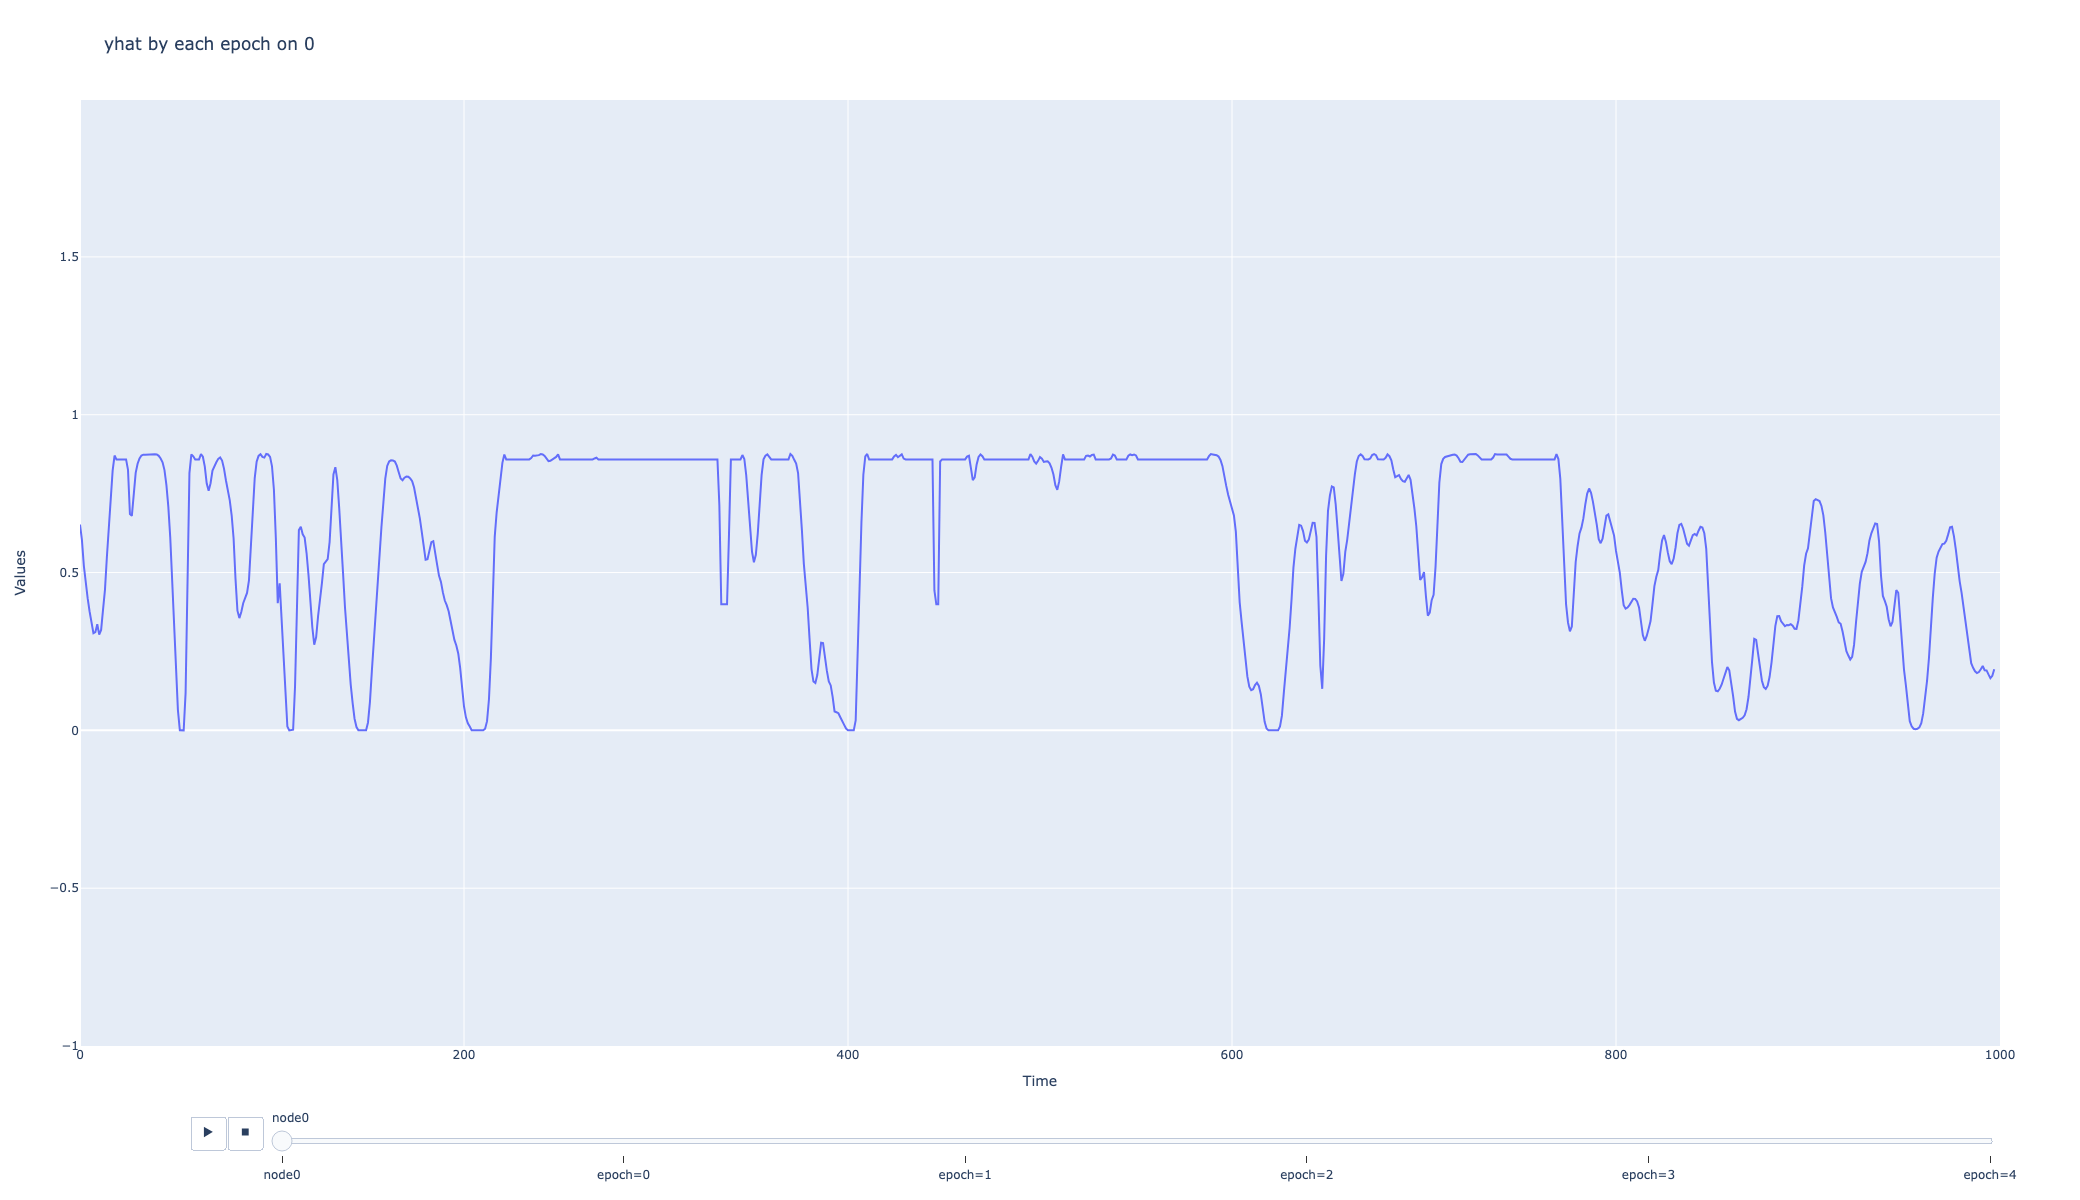

In [245]:
figs[3]

# 국가별 육상 발전

In [156]:
file_path = '../../../EMHIRES_WIND_COUNTRY_June2019.csv'

df4 = pd.read_csv(file_path).iloc[:,1:]

In [157]:
df4

,Time_step,Date,Year,Month,Day,Hour,AL,AT,BE,BG,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,UK
0,1,1986-01-01,1986,1,1,0,0.3685,0.06084,0.25200,0.23762,...,0.40628,0.26292,0.12015,0.22683,0.05124,0.25050,0.17086,0.67720,0.05715,0.268794
1,2,1986-01-01,1986,1,1,1,0.3235,0.05282,0.23841,0.23842,...,0.39115,0.26376,0.11985,0.25821,0.04665,0.24625,0.15909,0.66776,0.05218,0.270761
2,3,1986-01-01,1986,1,1,2,0.2735,0.04276,0.22110,0.23033,...,0.36163,0.26695,0.12113,0.27921,0.04543,0.23250,0.15296,0.65904,0.03905,0.265209
3,4,1986-01-01,1986,1,1,3,0.2600,0.02914,0.21491,0.24158,...,0.35170,0.27101,0.11858,0.33106,0.04455,0.20525,0.15328,0.58460,0.02130,0.257709
4,5,1986-01-01,1986,1,1,4,0.2530,0.01780,0.20304,0.26168,...,0.36168,0.28097,0.11101,0.38668,0.05438,0.20075,0.15013,0.46732,0.01029,0.247726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262963,262964,2015-12-31,2015,12,31,19,0.3525,0.18437,0.46108,0.30475,...,0.52757,0.52982,0.22506,0.04449,0.09175,0.05000,0.45450,0.13181,0.12105,0.598970
262964,262965,2015-12-31,2015,12,31,20,0.3300,0.11749,0.47618,0.25730,...,0.54643,0.52343,0.19841,0.05407,0.08498,0.03400,0.40358,0.06790,0.05857,0.554731
262965,262966,2015-12-31,2015,12,31,21,0.2645,0.06737,0.48898,0.23442,...,0.56286,0.52993,0.16531,0.07051,0.09125,0.01975,0.35219,0.05919,0.01952,0.519908
262966,262967,2015-12-31,2015,12,31,22,0.2070,0.03582,0.49315,0.23482,...,0.56231,0.54109,0.13804,0.08945,0.11247,0.01600,0.31360,0.05301,0.00923,0.489973


# 전력 시장 입찰 구역별(bidding zone)

- Norway NO1, NO2, NO3, NO4, NO5
- Sweden SW1, SW2, SW3, SW4
- CNOR, NORD, SARD, SUD, CSUD, SICI
- Denmark DK1, DK2

In [150]:
file_path = '../../../TS.CF.BZN.30yr.csv'

df2 = pd.read_csv(file_path).iloc[:,1:]

In [151]:
df2

,NO1,NO2,NO3,NO4,NO5,SW1,SW2,SW3,SW4,CNOR,NORD,SARD,SUD,CSUD,SICI,DK1,DK2
0,0.02033,0.37364,0.34414,0.18615,0.05253,0.22493,0.49998,0.03415,0.20963,0.00253,0.00099,0.06554,0.76653,0.34372,0.34142,0.26187,0.16770
1,0.02236,0.40525,0.33389,0.18148,0.05556,0.23575,0.55614,0.03368,0.18560,0.00230,0.00221,0.07814,0.60382,0.24513,0.39121,0.23275,0.14769
2,0.03862,0.43173,0.29841,0.18921,0.05758,0.24070,0.63684,0.03511,0.17048,0.00207,0.00201,0.09363,0.45107,0.18665,0.40738,0.20765,0.13442
3,0.02846,0.45253,0.30499,0.18747,0.06162,0.24472,0.72072,0.03781,0.16577,0.00176,0.00158,0.10456,0.32471,0.15934,0.41477,0.19466,0.12898
4,0.01016,0.46650,0.34057,0.18801,0.06263,0.24426,0.79018,0.04165,0.15682,0.00153,0.00151,0.11080,0.20886,0.11083,0.41262,0.18444,0.12402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262963,0.95000,0.42565,0.85318,0.41256,0.15152,0.29312,0.95000,0.95000,0.38841,0.00910,0.00391,0.00000,0.04314,0.01800,0.01305,0.21222,0.07149
262964,0.81707,0.39801,0.85213,0.41254,0.15152,0.29142,0.95000,0.95000,0.33037,0.01140,0.00456,0.00001,0.01454,0.00393,0.00374,0.18705,0.06703
262965,0.56707,0.44002,0.85094,0.41254,0.15152,0.28207,0.95000,0.95000,0.28038,0.01094,0.00305,0.00001,0.01450,0.00197,0.00155,0.16898,0.05746
262966,0.53049,0.49951,0.84965,0.41314,0.15152,0.27935,0.95000,0.95000,0.24708,0.01119,0.00279,0.00000,0.02317,0.00241,0.00084,0.16699,0.04924


# NUTS 2 수준으로 세분화된 데이터

In [155]:
file_path = '../../../EMHIRES_WIND_NUTS2_June2019.csv'

df3 = pd.read_csv(file_path).iloc[:,1:]

In [158]:
df3

,Time step,AL01,AL02,AL03,AT11,AT12,AT13,AT21,AT22,AT31,...,UKK3,UKK4,UKL1,UKL2,UKM5,UKM6,UKM7,UKM8,UKM9,UKN0
0,1,0.284,0.284,0.453,0.026,0.058,0.024,0.049,0.049,0.348,...,0.198,0.284,0.501,0.390,0.174,0.477,0.042,0.241,0.241,0.292
1,2,0.285,0.285,0.362,0.022,0.049,0.015,0.048,0.048,0.338,...,0.094,0.177,0.425,0.332,0.232,0.496,0.068,0.274,0.274,0.219
2,3,0.262,0.262,0.285,0.015,0.038,0.006,0.060,0.060,0.298,...,0.041,0.093,0.342,0.250,0.317,0.521,0.086,0.262,0.262,0.133
3,4,0.262,0.262,0.258,0.007,0.025,0.000,0.054,0.054,0.229,...,0.035,0.050,0.261,0.127,0.429,0.556,0.097,0.221,0.221,0.062
4,5,0.243,0.243,0.263,0.002,0.015,0.000,0.048,0.048,0.150,...,0.088,0.050,0.184,0.083,0.541,0.594,0.086,0.149,0.149,0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262963,262964,0.044,0.044,0.661,0.188,0.187,0.140,0.047,0.047,0.017,...,0.486,0.565,0.617,0.520,0.696,0.747,0.900,0.940,0.940,0.589
262964,262965,0.044,0.044,0.616,0.127,0.114,0.075,0.042,0.042,0.011,...,0.327,0.328,0.417,0.310,0.797,0.859,0.923,0.855,0.855,0.411
262965,262966,0.025,0.025,0.504,0.083,0.059,0.034,0.039,0.039,0.009,...,0.228,0.243,0.298,0.220,0.976,0.855,0.865,0.726,0.726,0.427
262966,262967,0.021,0.021,0.393,0.046,0.028,0.011,0.048,0.048,0.008,...,0.137,0.196,0.279,0.184,0.962,0.837,0.777,0.649,0.649,0.515
